# Installation de Gensim

Si vous n'avez pas encore installé Gensim, vous pouvez le faire en utilisant pip :

Pour charger un modèle word2vec, il est possible de :

- Utiliser l'api de Gensim: Gensim fournit un accès facile à plusieurs modèles word2vec pré-entraînés. Vous pouvez charger un modèle pré-entraîné à partir de Google News ou d'autres sources disponibles.

In [1]:
import gensim.downloader as api

##w2v_model = api.load('word2vec-google-news-300')


- Charger un modèle word2vec à partir d'un fichier : Si vous avez un modèle word2vec stocké localement sous forme de fichier, vous pouvez le charger directement.

Pour accéder à des modèles word2vec en français, qui peuvent être moins fréquents que ceux en anglais, vous pouvez récupérer des modèles pré-entraînés depuis la page web de Jean-Philippe Fauconnier à l'adresse suivante : https://fauconnier.github.io/#works.

Sur cette page, Fauconnier propose plusieurs modèles pré-entraînés en français, utiles pour des tâches de traitement automatique des langues naturelles. Une fois que vous avez téléchargé le modèle souhaité, vous pouvez l'utiliser avec Gensim de la même manière que vous le feriez avec n'importe quel autre modèle word2vec.

In [1]:
from gensim.models import KeyedVectors

# Charger un modèle word2vec à partir d'un fichier local.
w2v_model = KeyedVectors.load_word2vec_format('frWiki_no_phrase_no_postag_700_cbow_cut100.bin', binary=True)

Le modèle récupéré est un objet de la classe`KeyedVectors`, une classe spécialement conçue pour stocker et manipuler les vecteurs de mots obtenus à partir de modèles comme Word2Vec, FastText, etc. 

Voici quelques points clés à propos des `KeyedVectors` :

1. **Stockage des vecteurs de mots** : `KeyedVectors` stocke les vecteurs de mots dans une structure qui permet un accès rapide et efficace aux vecteurs par le biais de mots-clés.

2. **Opérations sur les mots** : Avec `KeyedVectors`, vous pouvez effectuer diverses opérations linguistiques et mathématiques, telles que trouver le mot le plus similaire, calculer la similarité entre deux mots, ou effectuer des analogies de mots (comme "roi" - "homme" + "femme" = "reine").

3. **Indépendance du modèle d'entraînement** : Une fois que les vecteurs sont extraits et stockés dans `KeyedVectors`, ils sont indépendants du modèle d'entraînement. Cela signifie que vous n'avez pas besoin du modèle complet pour manipuler ces vecteurs.

4. **Efficacité en mémoire et vitesse** : Les `KeyedVectors` sont conçus pour être efficaces en termes de mémoire et rapides en termes de récupération des vecteurs, ce qui est essentiel pour les applications en temps réel.

En résumé, `KeyedVectors` est une classe pratique et puissante pour travailler avec des représentations vectorielles de mots dans des applications de traitement du langage naturel (NLP).

In [3]:
type(w2v_model)

gensim.models.keyedvectors.KeyedVectors

In [4]:
# Taille du vocabulaire.
len(w2v_model)

39392

In [5]:
# Pour obtenir la représentation vectorielle du mot "étudiant".
w2v_model['étudiant']

array([ 1.58554520e-02,  5.63152790e-01,  4.66193497e-01,  5.20626679e-02,
        2.68750042e-01, -2.71563202e-01, -4.83606523e-03, -2.45778337e-01,
       -3.96759957e-01, -1.65600836e-01, -1.04174383e-01, -7.24663019e-01,
       -3.84070724e-01,  7.88141012e-01, -3.38770151e-01,  1.34992301e-01,
        4.76687849e-01, -3.34785998e-01,  1.03322506e+00,  2.35330593e-02,
       -2.84593046e-01, -1.03613250e-01,  9.10975412e-02,  1.28462195e+00,
        1.06190360e+00, -5.32885075e-01,  9.95849445e-02, -5.68837047e-01,
       -2.44750783e-01, -5.03479004e-01, -2.71755427e-01, -7.77692497e-01,
       -5.10058999e-01, -4.28112239e-01, -5.59406459e-01, -5.13831615e-01,
       -7.01650918e-01,  7.85965443e-01,  2.83581734e-01, -8.89827669e-01,
       -1.42674670e-01,  1.03009596e-01, -7.50346363e-01,  5.92534006e-01,
        9.46473479e-02, -1.28313944e-01, -2.60010332e-01,  6.67580605e-01,
       -5.02833724e-03, -1.05887920e-01,  3.13263275e-02,  6.39597997e-02,
       -4.29497927e-01, -

In [6]:
w2v_model.most_similar('étudiant')

[('université', 0.6833933591842651),
 ('enseignant', 0.5148687362670898),
 ('campus', 0.4950049817562103),
 ('universitaire', 0.4722594618797302),
 ('estudiantin', 0.4194357991218567),
 ('professeur', 0.4011576771736145),
 ('élève', 0.369378924369812),
 ('cursus', 0.3621717393398285),
 ('diplômé', 0.34850895404815674),
 ('yale', 0.34616345167160034)]

Pour le modèle, “roi” est à “reine”, ce que “homme” est à “femme”, il suffit d’opérer la même translation, le même glissement sémantique, pour passer de l’un à l’autre.

In [7]:
w2v_model.most_similar(positive=['roi', 'femme'], negative=['homme'], topn=1)

[('reine', 0.391459584236145)]

# Projecteur TensorBoard

Le Projecteur TensorBoard est un outil de visualisation intégré qui permet de visualiser les représentations vectorielles en haute dimension, comme les vecteurs de mots ou les embeddings d'images, en les réduisant à des espaces 2D ou 3D pour faciliter l'analyse et l'interprétation. Il offre des fonctionnalités interactives telles que le zoom, la rotation, et la recherche de points spécifiques.



Pour utiliser le Projecteur TensorBoard, vous avez deux options principales : en local ou en utilisant l'interface web directement sur [projector.tensorflow.org](https://projector.tensorflow.org/).

1. **En local**:
   - Importez votre jeu de données et votre modèle.
   - Préparer vos embeddings et les métadonnées associées.
   - Utilisez le code pour configurer le projecteur TensorBoard et sauvegardez les embeddings.
   - Lancez TensorBoard dans Colab en utilisant `%tensorboard --logdir logs`.
   - Visualisez et interagissez avec les embeddings dans l'interface TensorBoard.


2. **Interface Web [projector.tensorflow.org](https://projector.tensorflow.org/)**:
   - Préparez vos embeddings et les fichiers de métadonnées associées.
   - Allez sur [projector.tensorflow.org](https://projector.tensorflow.org/).
   - Chargez vos fichiers d'embeddings (typiquement un fichier TSV) et de métadonnées (fichier TSV) en utilisant l'option "Load" sur le site.
   - Une fois chargés, vous pouvez interagir avec vos données directement dans le navigateur.

Chaque méthode a ses avantages : Colab facilite la gestion du code et de l'environnement, tandis que l'interface web est plus simple pour une visualisation rapide sans avoir besoin de configurer un environnement de codage.


https://projector.tensorflow.org/

In [8]:
# Définir le nombre de mots à visualiser.
max_mots = 10000

# Obtenir les mots et les vecteurs.
mots = []
vecteurs = []
for mot in w2v_model.index_to_key[:max_mots]:
    mots.append(mot)
    vecteurs.append(w2v_model[mot])

# Exporter les métadonnées (mots).
with open("meta.tsv", "w", encoding="utf-8") as file_meta:
    for mot in mots:
        file_meta.write(mot + "\n")

# Exporter les vecteurs.
with open("vecteurs.tsv", "w", encoding="utf-8") as file_vecteurs:
    for vecteur in vecteurs:
        file_vecteurs.write("\t".join([str(x) for x in vecteur]) + "\n")

TensorBoard est inclus avec TensorFlow, vous pouvez l'installer via pip :

In [9]:
# Cela affichera la version de TensorBoard que vous avez installée.
!tensorboard --version

2.10.0


Pour lancer TensorBoard

In [10]:
from tensorboard.plugins import projector
import os

# Chemin du répertoire de logs.
LOG_DIR = 'logs'
if not os.path.exists(LOG_DIR):
    os.makedirs(LOG_DIR)

In [11]:
import tensorflow as tf
import numpy as np
from tensorboard.plugins import projector


# Charger les vecteurs de mots.
vecteurs_np = np.loadtxt('vecteurs.tsv', delimiter='\t')

# Créer un graphe TensorFlow.
graphe = tf.Graph()

with graphe.as_default():
    # Créer un tenseur TensorFlow à partir des vecteurs numpy
    vecteurs_tf = tf.Variable(vecteurs_np, name='vecteurs_mots')

    # Initialiser une session TensorFlow
    with tf.compat.v1.Session() as sess:

        # Initialiser les variables
        sess.run(tf.compat.v1.global_variables_initializer())

        # Créer un FileWriter pour écrire les logs
        writer = tf.compat.v1.summary.FileWriter('logs', sess.graph)

        # Configurer le projecteur.
        config = projector.ProjectorConfig()
        embedding = config.embeddings.add()
        embedding.tensor_name = vecteurs_tf.name
        embedding.metadata_path = '../meta.tsv'  # Assurez-vous que ce fichier existe

        # Sauvegarder la configuration.
        projector.visualize_embeddings(writer, config)

        # Sauvegarder les vecteurs de mots.
        saver = tf.compat.v1.train.Saver([vecteurs_tf])
        saver.save(sess, 'logs/vecteurs_mots.ckpt')

        
# Lancer TensorBoard.
!tensorboard --logdir=logs

^C


#### Visualize word embeddings in a 2D plan

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


def plot_2d(data: pd.DataFrame, 
            x_col: str, 
            y_col: str, 
            color_col: str, 
            text_col:str, 
            height: int = 10, 
            width: int = 14, 
            title_text: str = '') -> None:
    """
    Affiche un scatter plot 2D en utilisant matplotlib et seaborn.

    Args:
        data: Le DataFrame contenant les données à visualiser.
        x_col: Le nom de la colonne pour l'axe des abscisses.
        y_col: Le nom de la colonne pour l'axe des ordonnées.
        color_col: Le nom de la colonne pour colorer les points.
        text_col: Le nom de la colonne pour ajouter des étiquettes aux points.
        height: La hauteur de la figure.
        width: La largeur de la figure.
        title_text: Le titre du graphique.
    """

    # Créer une figure et un axe avec matplotlib.
    plt.figure(figsize=(width, height))

    # Utiliser seaborn pour créer un scatter plot.
    scatter_plot = sns.scatterplot(data=data, x=x_col, y=y_col, hue=color_col)

    # Ajouter des étiquettes
    for line in range(0, data.shape[0]):
        scatter_plot.text(data[x_col][line]+0.01, data[y_col][line], 
                          data[text_col][line], horizontalalignment='left', 
                          size='small', color='black')

    # Configurer le titre et montrer le plot.
    plt.title(title_text)
    plt.show()

In [13]:
words = {
    'IT': ['ordinateur', 'algorithme', 'linux', 'internet', 'wifi', 'système', 'matériel', 'logiciel', 'programmation', 'codage', 'donnée', 'ingénierie', 'réseau',
           'processeur', 'développeur', 'ingénieur', 'cryptographie', 'web', 'java', 'javascript', 'python', 'binaire', 'linux', 'assembleur', 'web'],
    'politique': ['élection', 'président', 'parlement', 'ministre', 'scandale', 'élection', 'démocratie', 'constitution', 'législation', 'pays', 'vote', 'gouvernement', 'gouverneur',
                  'sénateur', 'suffrage', 'parlementaire', 'droit', 'république', 'libéral', 'égalité', 'civique', 'société', 'politique', 'droit', 'politique'],
    'santé': ['médecin', 'maladie', 'cancer', 'grippe', 'douleur', 'hôpital', 'traitement', 'médicament', 'diagnostic', 'pronostic', 'blessure', 'médical', 'thérapie', 'médecine',
              'santé', 'clinique', 'neurologique', 'soin', 'anatomie', 'immunologie', 'chirurgie', 'chirurgien', 'endocrinien', 'traumatisme', 'pédiatrie', 'dermatologie', 'transplantation',
              'ophtalmologie', 'orthopédie', 'urologie', 'neurologie', 'pédiatrie']
}

# Création de listes pour les mots et leurs catégories.
word_labels = []
word_topics = []

for topic, list_ in words.items():
    word_labels.extend(list_)
    word_topics.extend([topic] * len(list_))

# Création du DataFrame
df = pd.DataFrame({'word': word_labels, 'topic': word_topics})

print(df.head())

         word topic
0  ordinateur    IT
1  algorithme    IT
2       linux    IT
3    internet    IT
4        wifi    IT


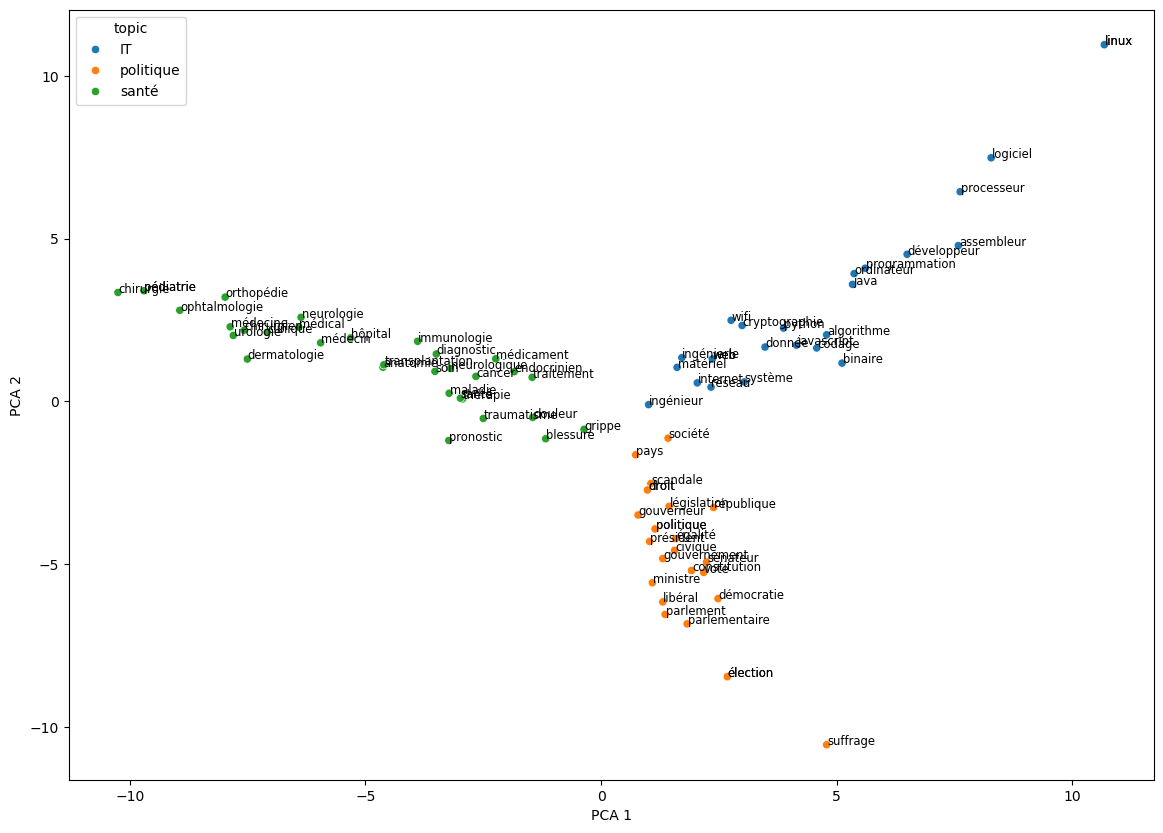

In [14]:
from sklearn.decomposition import PCA

# Assurez-vous que w2v_model et df sont déjà définis et chargés

# Création d'un tableau de vecteurs pour les mots présents dans le modèle
vectors = np.array([w2v_model[x] for x in df['word'] if x in w2v_model])

# Réduction de dimension avec ACP
pca = PCA(n_components=2, random_state=2023)
vectors_2D = pca.fit_transform(vectors)

# Ajout des dimensions réduites au DataFrame
df['PCA 1'] = vectors_2D[:, 0]
df['PCA 2'] = vectors_2D[:, 1]
plot_2d(df, x_col="PCA 1", y_col="PCA 2", color_col='topic', text_col="word")

In [15]:
from sklearn.manifold import TSNE
import umap

# Création d'un tableau de vecteurs pour les mots présents dans le modèle
vectors = np.array([w2v_model[x] for x in df['word'] if x in w2v_model])

# Réduction de dimension avec UMAP
umap_model = umap.UMAP(n_components=2, 
                       metric='cosine', 
                       random_state=2023)
vectors_2D = umap_model.fit_transform(vectors)

# Ajout des dimensions réduites au DataFrame
df['UMAP 1'] = vectors_2D[:, 0]
df['UMAP 2'] = vectors_2D[:, 1]

# Mélanger les données
df = df.sample(frac=1, random_state=26)

c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x0000024586E96050>
Traceback (most recent call last):
  File "c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\llvmlite\binding\executionengine.py", line 171, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):
KeyboardInterrupt: 


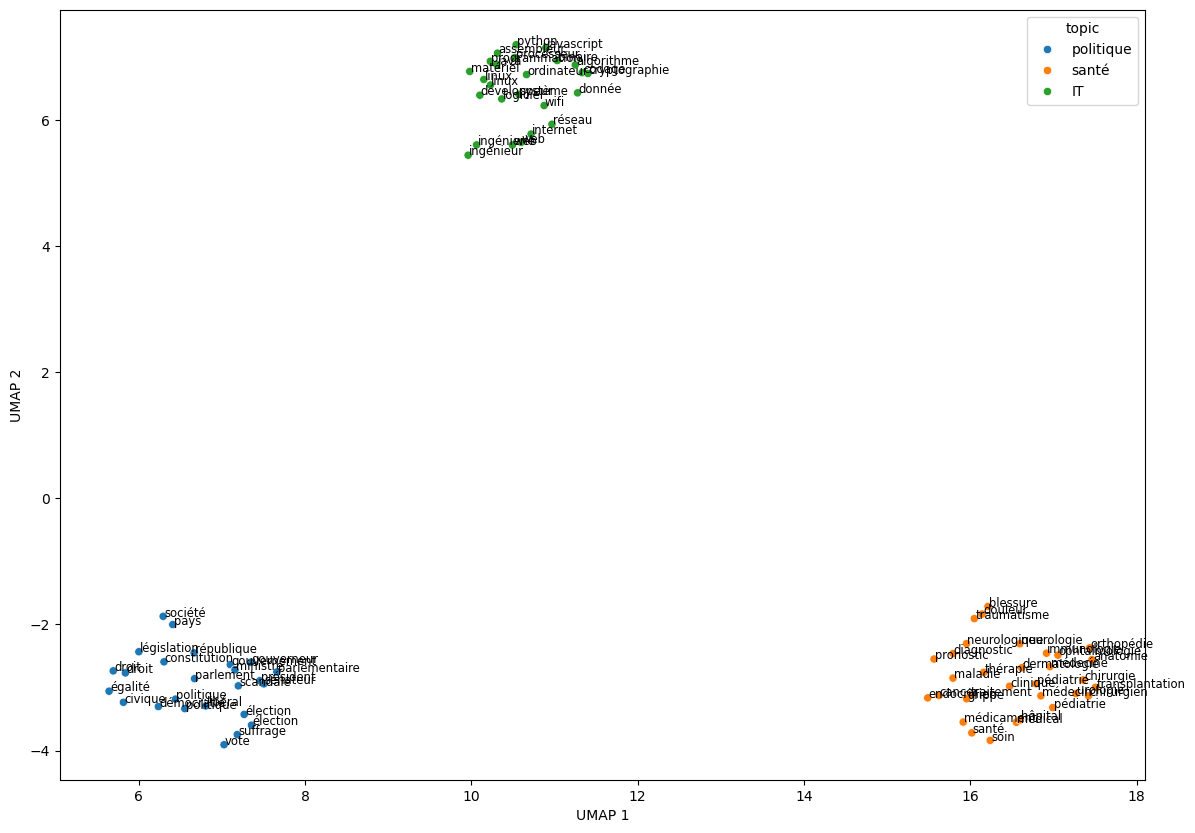

In [ ]:
plot_2d(df, x_col="UMAP 1", y_col="UMAP 2", color_col='topic', text_col="word")

In [ ]:
from stop_words import get_stop_words
stopwords_list = set(get_stop_words('fr'))

In [ ]:
import wikipedia
from typing import List, Dict
import re
wikipedia.set_lang("fr")



def tokenize(text: str) -> List[str]:
    """
    Tokenise un texte en utilisant une expression régulière.

    Cette fonction découpe le texte en tokens basés sur l'expression régulière fournie.
    Elle est conçue pour extraire des mots composés d'au moins deux caractères alphanumériques.

    Args:
        text: Le texte à tokeniser.

    Returns:
        list: Une liste de tokens (mots) extraits du texte.

    Exemple:
        >>> tokenize("Ceci est un exemple de test.")
        ['Ceci', 'est', 'un', 'exemple', 'de', 'test']
    """

    # Définir le motif pour l'extraction de mots (tokens).
    token_pattern = r"\w\w+"
    token_pattern = re.compile(token_pattern)

    # Trouver tous les tokens dans le texte.
    tokens = token_pattern.findall(text)

    return tokens



def wiki_dataset(queries: Dict[str, list]) -> List[str]:
    """
    Crée un corpus de tokens à partir des pages Wikipédia correspondant à une liste de requêtes.

    Args:
        queries: Un dictionnaire contenant des listes de requêtes, organisées par catégorie.

    Returns:
        list: Une liste de listes de tokens, où chaque sous-liste représente le contenu tokenisé d'un paragraphe Wikipédia.
    """
    corpus = []
    labels = []
    for category in queries:
        # Itérer à travers chaque catégorie de requêtes
        for query in queries[category]:
            # Rechercher des pages Wikipédia correspondant à la requête
            pages = wikipedia.search(query)
            for page in pages:
                try:
                    # Tenter d'obtenir le contenu de la page Wikipédia.
                    wiki = wikipedia.page(page)
                except:
                    # Ignorer la page si une erreur survient (par exemple, page non trouvée).
                    continue
                else:
                    # Convertir le contenu de la page en minuscules.
                    content = wiki.content.lower()
                    # Séparer le contenu en paragraphes
                    paragraphs = content.split('\n')
                    for parag in paragraphs:
                        # Tokeniser chaque paragraphe.
                        tokens = tokenize(parag)
                        # Filtrer les tokens en enlevant les mots vides (stopwords).
                        tokens = [token for token in tokens if token not in stopwords_list]
                        # Ajouter les tokens filtrés au corpus.
                        corpus.append(tokens)
                        labels.append(category)
    return corpus, labels


# Exemple d'utilisation
queries = {
    'IT': ['ordinateur', 'algorithme', 'internet', 'logiciel', 'programmation', 'processeur'],
    'politique': ['élection', 'président', 'parlement', 'ministre', 'démocratie', 'droit', 'politique'],
    'santé': ['médecin', 'maladie', 'douleur', 'hôpital', 'traitement', 'médicament', 'diagnostic', 'pronostic', 'santé']
}

corpus, labels = wiki_dataset(queries)

c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [ ]:
from collections import Counter
Counter(labels)

Counter({'santé': 14716, 'IT': 13769, 'politique': 10660})

In [ ]:
corpus[0]

['ordinateur',
 'personnel',
 'anglais',
 'personal',
 'computer',
 'pc',
 'confond',
 'aujourd',
 'hui',
 'micro',
 'ordinateur',
 'ordinateur',
 'individuel',
 'ordinateur',
 'destiné',
 'usage',
 'prix',
 'accessible',
 'dont',
 'dimensions',
 'assez',
 'réduites',
 'tenir',
 'bureau',
 'première',
 'machine',
 'appelée',
 'micro',
 'ordinateur',
 'micral',
 'breveté',
 '1973',
 'français',
 'françois',
 'gernelle',
 'toutefois',
 'époque',
 'pouvait',
 'déjà',
 'considérer',
 'ordinateurs',
 'personnels',
 'mini',
 'ordinateurs',
 'diffusés',
 'cours',
 'années',
 '1960',
 'ainsi',
 'premier',
 'ordinateur',
 'bureau',
 'olivetti',
 'programma',
 '101',
 'commercialisé',
 '1965',
 'quant',
 'premiers',
 'ordinateurs',
 'personnels',
 'grand',
 'public',
 'apparus',
 'fin',
 'années',
 '1970',
 'premiers',
 'objet',
 'certaine',
 'popularité',
 'mis',
 'marché',
 '1977']

# Vectorisation des documents

Nous devons créer une fonction qui transforme une liste de $n$ documents en une matrice $X$ de taille $n \times d$, $d$ étant le nombre de dimensions du modèle d'embedding.

Étant donné un modèle d'embedding (par exemple, word2vec), chaque document est vectorisé de la manière suivante :
1. Le document est tokenisé (divisé en mots).
2. Un vecteur de taille $d$ est calculé pour chaque mot.
3. Les vecteurs des mots sont moyennés ensemble pour former un seul vecteur de taille $d$.

In [ ]:
from gensim.models import Word2Vec
import numpy as np


def vectorize_documents(tokenized_documents, w2v_model):
    """
    Transforme une liste de documents tokenisés en une matrice de vecteurs en utilisant un modèle Word2Vec.
    Chaque document est représenté par la moyenne des vecteurs de ses tokens.

    Args:
        tokenized_documents: Liste de documents tokenisés (chaque document est une liste de tokens).
        w2v_model: Modèle Word2Vec utilisé pour la vectorisation.

    Returns:
        np.array: Matrice de taille n x d, où n est le nombre de documents et d est le nombre de dimensions du modèle Word2Vec.
    """
    vectorized_docs = []

    for tokens in tokenized_documents:

        # Filtrage des tokens qui sont dans le modèle Word2Vec.
        word_vectors = [w2v_model[token] for token in tokens if token in w2v_model]

        # Moyenne des vecteurs des tokens pour obtenir le vecteur du document.
        if len(word_vectors) > 0:
            doc_vector = np.mean(word_vectors, axis=0)
        else:
            # Gérer le cas où aucun token n'est dans le modèle.
            doc_vector = np.zeros(w2v_model.vector_size)

        vectorized_docs.append(doc_vector)

    return np.array(vectorized_docs)

In [ ]:
X = vectorize_documents(corpus, w2v_model)

In [ ]:
X.shape

(39145, 700)

## Visualisation en 2D de documents avec réduction de dimension.

In [ ]:
def plot_2d_document(
            x_col: np.ndarray, 
            y_col: np.ndarray, 
            labels: List[str], 
            height: int = 10, 
            width: int = 14, 
            title_text: str = '') -> None:
    """
    Affiche un scatter plot 2D en utilisant matplotlib et seaborn.

    Args:
        data: Le DataFrame contenant les données à visualiser.
        x_col: L'axe des abscisses.
        y_col: L'axe des ordonnées.
        labels: Les labels pour colorer les points.
        height: La hauteur de la figure.
        width: La largeur de la figure.
        title_text: Le titre du graphique.
    """

    # Créer une figure et un axe avec matplotlib.
    plt.figure(figsize=(width, height))

    # Utiliser seaborn pour créer un scatter plot.
    scatter_plot = sns.scatterplot(x=x_col, 
                                   y=y_col, 
                                   hue=labels)

    # Configurer le titre et montrer le plot.
    plt.title(title_text)
    plt.show()

In [ ]:
X_2d = PCA(n_components=2, random_state=2023).fit_transform(X)

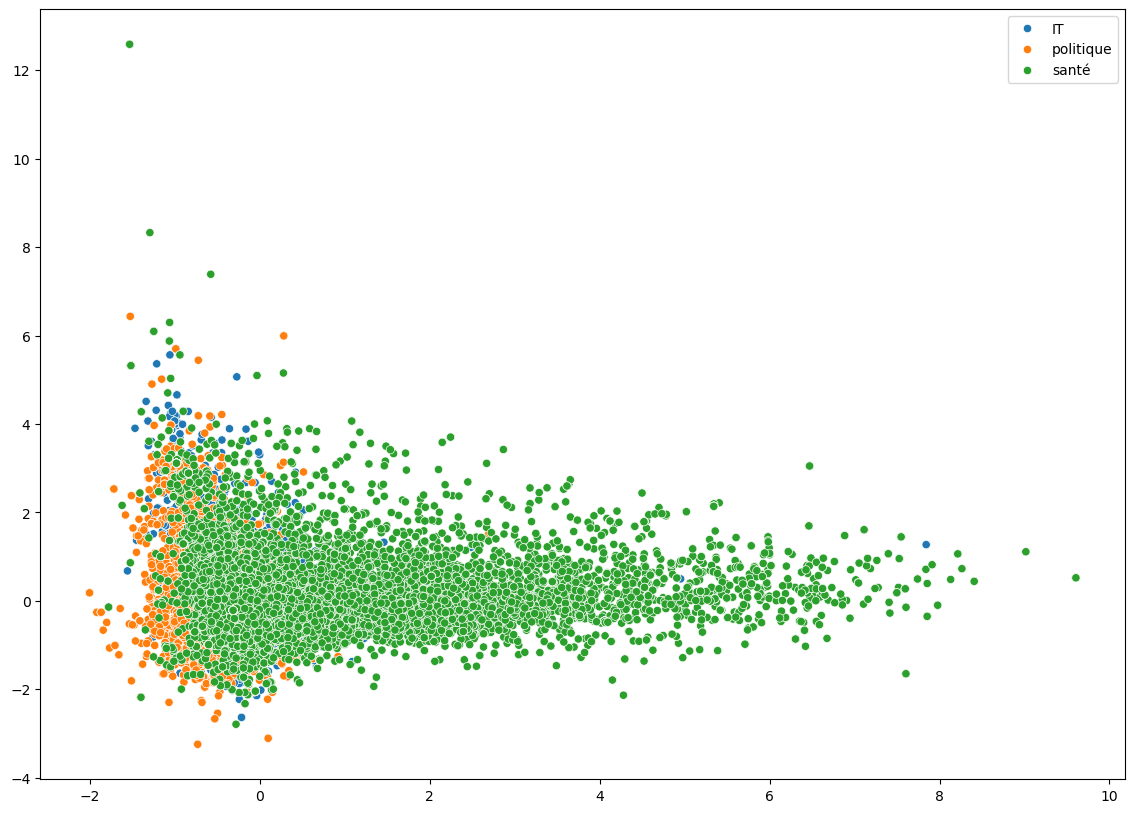

In [ ]:
plot_2d_document(X_2d[:, 0], X_2d[:, 1], labels)

c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


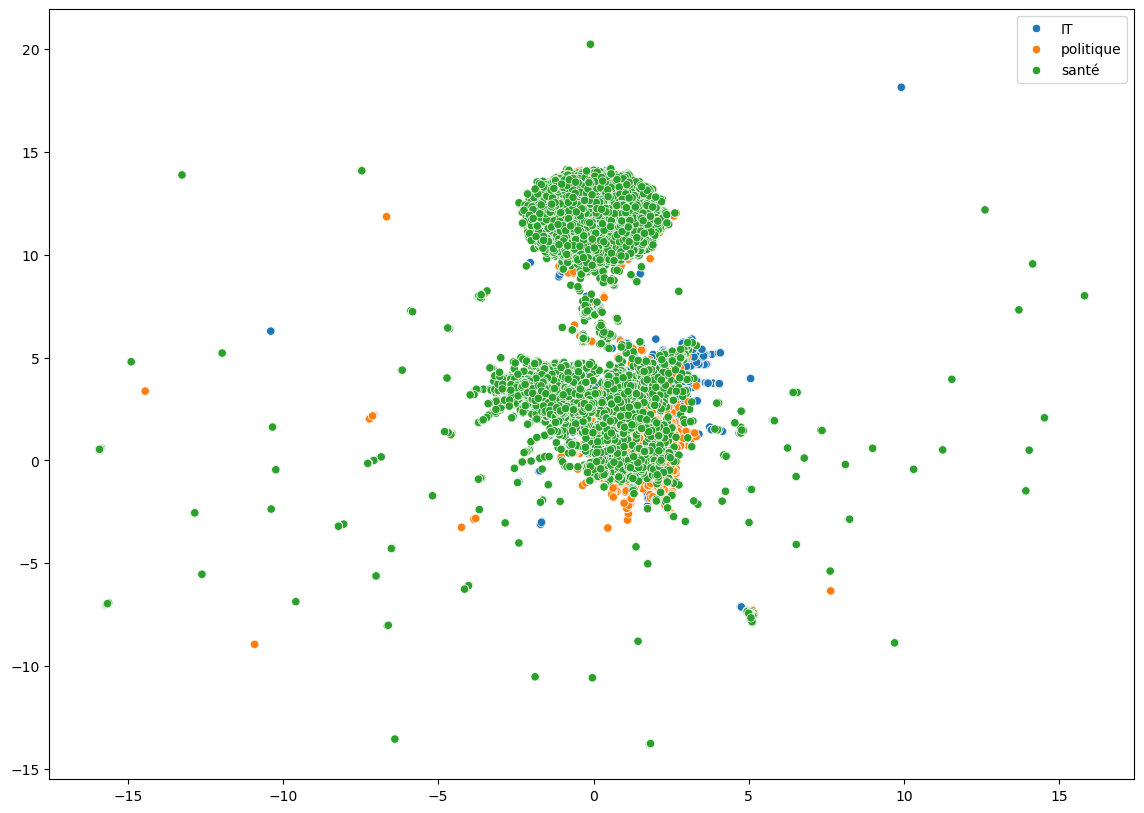

In [ ]:
X_2d = umap.UMAP(n_components=2, 
                 random_state=2023).fit_transform(X)

plot_2d_document(X_2d[:, 0], X_2d[:, 1], labels)

# Exercice 1 : Visualisation de documents par somme des tokens.

L'objectif de cet exercice est de visualiser des documents textuels en représentant chaque document par la somme de ses vecteurs de mots. 

In [3]:
from gensim.models import KeyedVectors

# Charger un modèle word2vec à partir d'un fichier local.
w2v_model = KeyedVectors.load_word2vec_format('frWiki_no_phrase_no_postag_700_cbow_cut100.bin', binary=True)

In [4]:
# A vous de jouer!
import numpy as np
data = np.load('data_tp.npy', allow_pickle=True)
data.shape

(38820,)

In [5]:
import numpy as np
labels = np.load('labels_tp.npy', allow_pickle=True)
labels.shape

(38820,)

In [6]:
def get_embeddings_somme(document, w2v_model):
    vector_sum = np.zeros_like(w2v_model['somme'])   #on initialise notre embeddings de zero 
    for word in document:
        if word in w2v_model:
            vector_sum += w2v_model[word]
    return vector_sum

document_vectors = [get_embeddings_somme(doc, w2v_model) for doc in data]
len(document_vectors) #juste pour voir


38820

### Visualisation : PCA
- Numerical data, high-dimensional data
- 	Assumes linear relationships, sensitive to outliers, useful for data compression.. (a standard way to use at first hehe)

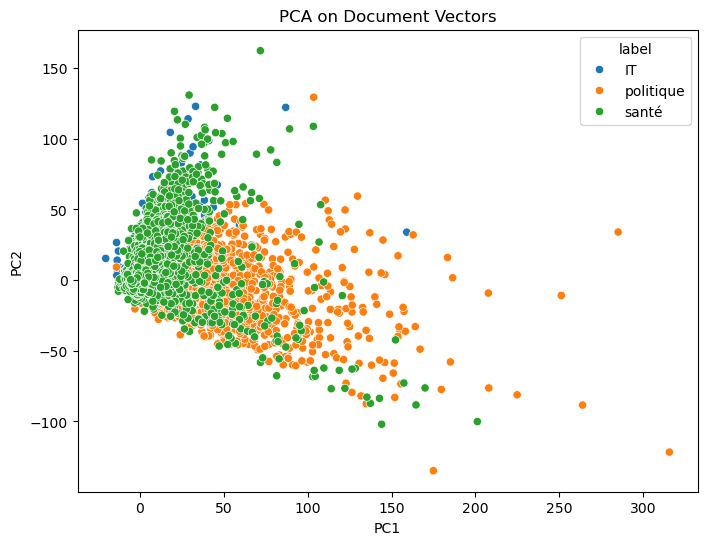

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
vecteurs = pca.fit_transform(document_vectors)

import seaborn as sns

df = pd.DataFrame(vecteurs, columns=['PC1', 'PC2'])
df['label'] = labels

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='label')
plt.title('PCA on Document Vectors')
plt.show()


In [10]:
import pandas as pd
dff = pd.DataFrame(document_vectors)
dff

,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699
0,-4.174530,6.451145,-4.881106,0.357013,-8.219408,1.031376,0.200720,-6.230652,17.194073,1.113709,...,-0.110815,-1.613538,6.543145,2.691629,3.723682,9.940738,-0.053252,-2.782650,2.146143,-4.634851
1,0.806396,0.706473,0.748547,-1.229403,0.811531,0.194312,-0.319736,-1.696538,-1.159599,1.526618,...,0.337077,-0.515103,-0.656522,-0.075321,-0.329602,1.006631,-0.565579,0.701722,-1.429863,-0.799239
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.552907,0.509586,0.978920,-0.098511,-0.102865,-0.558672,0.051732,-0.273164,-0.324016,-0.192639,...,0.272865,0.111809,0.155961,-0.827248,-0.026611,-0.470423,-0.171942,-0.045488,-0.131820,0.580289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38815,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
38816,0.558395,0.352120,-0.487920,-2.070533,0.820667,2.127715,-0.512277,0.282765,0.555665,2.335608,...,-0.103339,-0.816122,0.000146,3.187148,0.947615,-2.881407,1.393473,0.194624,0.493605,0.052220
38817,-0.394122,-0.519714,-0.972242,-1.340885,2.030576,0.263898,-1.038633,0.700656,0.367187,1.941827,...,1.140526,-0.647610,1.168736,1.141123,0.519593,-1.577753,0.400641,-0.350115,0.542167,-0.770211
38818,-1.445481,2.345210,-2.524988,-3.836349,-1.877451,-2.555423,0.140121,1.677364,-0.925414,1.162832,...,1.357035,-1.694634,1.414362,2.307394,1.008260,2.674186,-1.573041,1.876355,-0.394955,2.819197


### Visualisation CA : 
- Suitable for contingency tables, emphasizes relationships in categorical data (it uses chi2 distance, vu en cours)

In [ ]:
import prince

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)


ca = prince.CA(n_components=2)

ca = ca.fit(dff)

ca_vectors = ca.row_coordinates(dff)


ca_vectors['label'] = labels

ca_vectors.head()

,0,1,label
0,0.037875,-0.047639,IT
1,-0.000117,0.000609,IT
2,-0.007413,0.003267,IT
3,-0.007413,0.003267,IT
4,-0.007528,0.003584,IT


In [ ]:
colnames = df.columns.tolist()
colnames[0] = 'CA1'  
colnames[1] = 'CA2'  
ca_vectors.columns = colnames
ca_vectors

,CA1,CA2,label
0,0.037875,-0.047639,IT
1,-0.000117,0.000609,IT
2,-0.007413,0.003267,IT
3,-0.007413,0.003267,IT
4,-0.007528,0.003584,IT
...,...,...,...
38815,-0.007413,0.003267,santé
38816,-0.002096,-0.006069,santé
38817,-0.002853,-0.002843,santé
38818,-0.003584,0.001343,santé


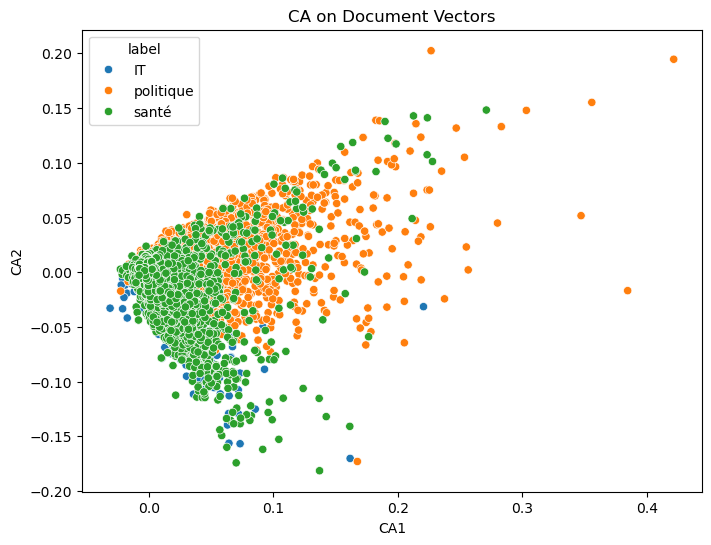

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=ca_vectors, x='CA1', y='CA2', hue='label')
plt.title('CA on Document Vectors')
plt.show()

### Visualisation TSNE : 
- Non-linear, sensitive to perplexity parameter, well-suited for visual exploration.
- Visualizing high-dimensional data, preserving local structure

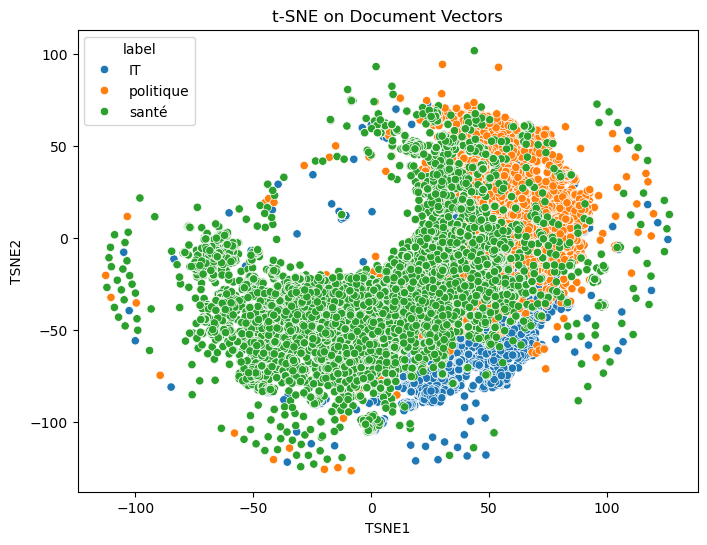

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_vectors = tsne.fit_transform(dff)

df_tsne = pd.DataFrame(tsne_vectors, columns=['TSNE1', 'TSNE2'])
df_tsne['label'] = labels

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='label')
plt.title('t-SNE on Document Vectors')
plt.show()


### Visualisation UMAP : 
- Preserving both global and local structure (intra et inter variances, travaille avec la variance totale)
- Non-linear, more efficient than t-SNE, robust to varying data densities.

c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


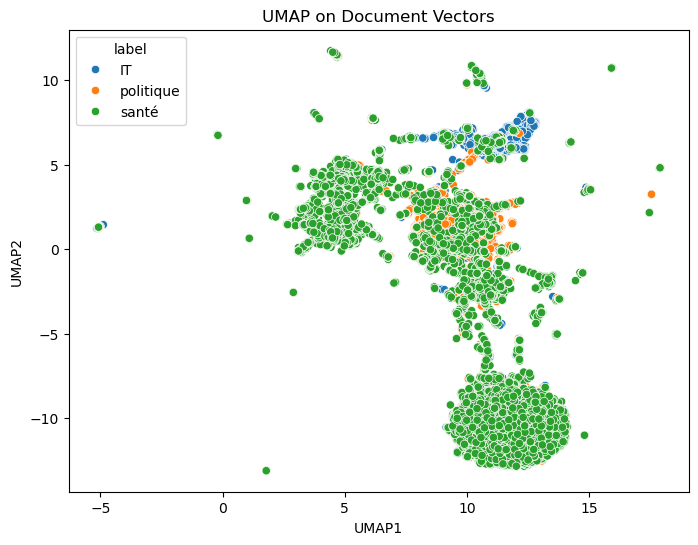

In [ ]:
import umap

umap_model = umap.UMAP(n_components=2)
umap_vectors = umap_model.fit_transform(dff)

df_umap = pd.DataFrame(umap_vectors, columns=['UMAP1', 'UMAP2'])
df_umap['label'] = labels

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', hue='label')
plt.title('UMAP on Document Vectors')
plt.show()


### Visualisation LDA : Meilleure separabilitee a cause de : 
- La taille des embeddings est de 700, ce qui est assez large pour converger vers une distribution normale et LDA suppose que la projection des donnees apres transformation converge vers unde distribution normale.
- Explication qu'on a fait en stat : Théorème central limite : une somme de variables aléatoires indépendantes et identiquement distribuées tend vers une variable aléatoire gaussienne.

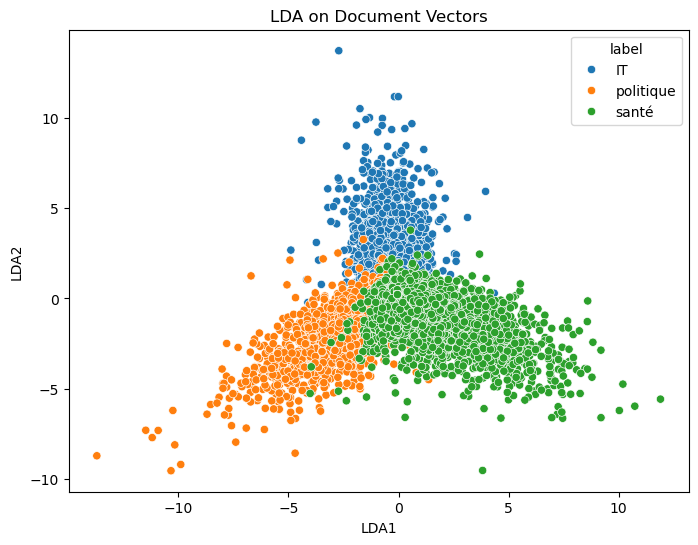

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
 
lda = LDA(n_components=2)
lda_vectors = lda.fit_transform(dff, labels)

df_lda = pd.DataFrame(lda_vectors, columns=['LDA1', 'LDA2'])
df_lda['label'] = labels

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_lda, x='LDA1', y='LDA2', hue='label')
plt.title('LDA on Document Vectors')
plt.show()


###### I wanted to use NBclust with pairwise dissimilarity matrix qu'on a fait en cours mais elle consomme beaucoup de memory.

# Exercice 2 : Clustering de documents avec k-means

L'objectif de cet exercice est de catégoriser des documents textuels en utilisant l'algorithme de clustering k-means sur la matrice \( X \) des vecteurs de documents. Ensuite, visualisez les résultats en colorant les points dans un graphique 2D selon les clusters obtenus.


#### Étapes suggérées

1. **Application de k-means** :
   - Utilisez l'algorithme k-means pour grouper les documents en 3 clusters. 
   - Chaque document sera assigné à un cluster.


2. **Visualisation avec clusters** :
   - Réalisez des visualisations 2D de la matrice \( X \) (réduite via ACP ou t-SNE) comme dans les étapes précédentes.
   - Cette fois, coloriez les points en fonction des clusters obtenus par k-means.
   - Analysez la répartition des clusters sur le plot.


3. **Évaluation et interprétation** :
   - Comparez les versions compressées (somme vs moyenne des embeddings) et déterminez laquelle représente le mieux les données originales.
   - Utilisez le score NMI pour évaluer numériquement la correspondance entre les clusters k-means et les étiquettes réelles.
   - Réfléchissez aux thèmes ou sujets principaux présents dans chaque cluster. Cela peut impliquer un examen des documents dans chaque cluster ou l'utilisation d'autres techniques d'analyse de texte.
   

**Ressources pour vous aider :**

- Scikit-learn offre une documentation complète sur K-means, avec des exemples, [Lien vers la documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
- Scikit-learn offre également une documentation complète sur la NMI [Lien vers la documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score as NMI

In [ ]:
pred = KMeans(n_clusters=3, 
              random_state=2024, 
              max_iter=300,
              n_init=10).fit(X).labels_

# Pour calculer la NMI, utilisez NMI(true_labels, predicted_labels)
# A vous de jouer!

NameError: name 'X' is not defined

### Ma contribution :
- Puisque LDA m'a donnee les meilleurs resultats en termes de separabilite, je vais utiliser les vecteur lda en entree pour mon algorithme k_means 

c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.70903885


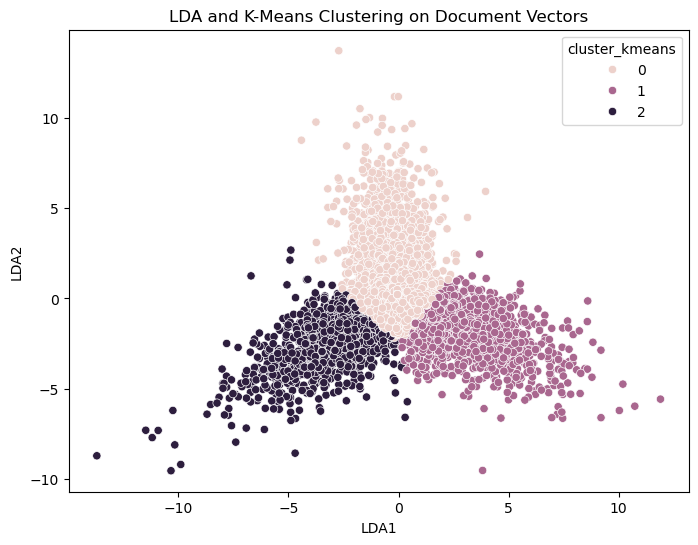

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3)  
clusters = kmeans.fit_predict(lda_vectors)

df_lda['cluster_kmeans'] = clusters

score = silhouette_score(lda_vectors, clusters)
print('Silhouette Score:', score)

# Plot the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_lda, x='LDA1', y='LDA2', hue='cluster_kmeans')
plt.title('LDA and K-Means Clustering on Document Vectors')
plt.show()


In [38]:
import pandas as pd

cross_tab = pd.crosstab(df_lda['label'], df_lda['cluster_kmeans'])

print(cross_tab) # c'est une sorte de confusion matrix

cluster_kmeans      0     1     2
label                            
IT              13269     6    14
politique        8673    14  2058
santé           11988  2727    71


Mon score silouhette me dit que mes cluster son generalement bien placcee mais apres analyse crosstab je remraque que : 
- Cluster 0: This cluster contains the majority of the ‘IT’, ‘politique’, and ‘santé’ labels. This suggests that Cluster 0 is not very discriminative, as it doesn’t separate the labels well.

- Cluster 1: This cluster contains a significant number of ‘santé’ labels (2734 out of 11981+2734+71), but very few ‘IT’ and ‘politique’ labels. This suggests that Cluster 1 might be capturing some specific aspect of the ‘santé’ label.

- Cluster 2: This cluster contains a significant number of ‘politique’ labels (2051 out of 8680+14+2051), but very few ‘IT’ and ‘santé’ labels. This suggests that Cluster 2 might be capturing some specific aspect of the ‘politique’ label.

Solution : Utiliser un autre algo de clustering que K-means

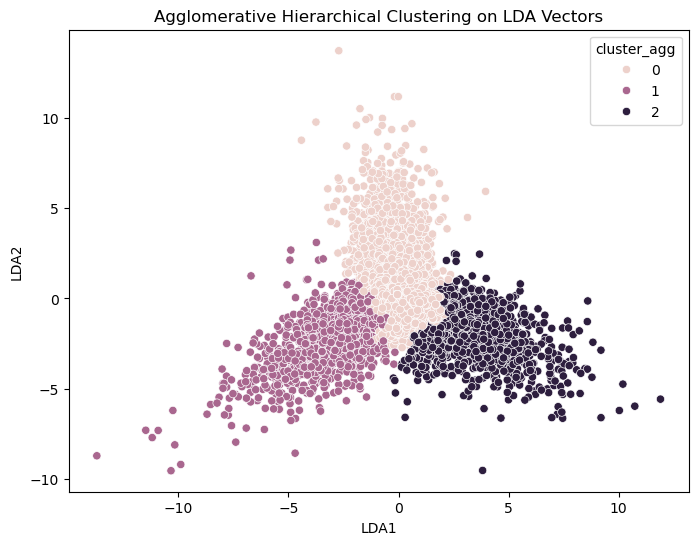

In [39]:
from sklearn.cluster import AgglomerativeClustering 

agg_clustering = AgglomerativeClustering(n_clusters=3)  
clusters = agg_clustering.fit_predict(lda_vectors)

df_lda['cluster_agg'] = clusters

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_lda, x='LDA1', y='LDA2', hue='cluster_agg')
plt.title('Agglomerative Hierarchical Clustering on LDA Vectors')
plt.show()

In [40]:
cross_tab_agg = pd.crosstab(df_lda['label'], df_lda['cluster_agg'])

print(cross_tab_agg) # c'est une sorte de confusion matrix, shwos que cet algo a fait mieux que kmeans mais still not good enough

cluster_agg      0     1     2
label                         
IT           13239    40    10
politique     8277  2461     7
santé        12921    74  1791


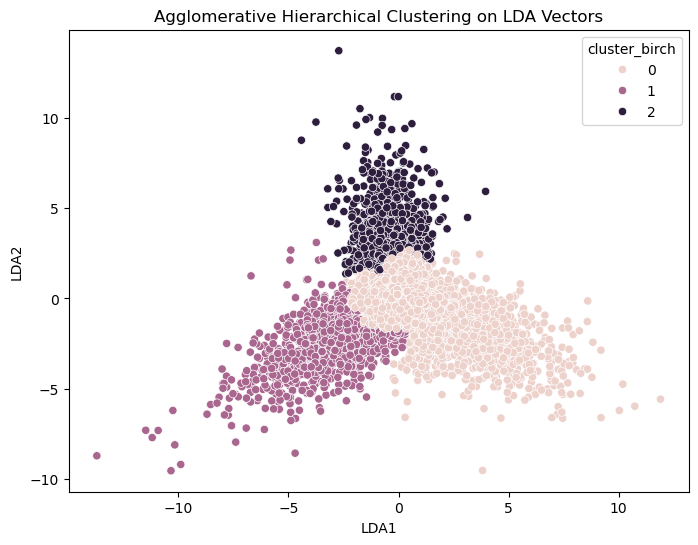

In [41]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=3)  
clusters = birch.fit_predict(lda_vectors)
df_lda['cluster_birch'] = clusters

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_lda, x='LDA1', y='LDA2', hue='cluster_birch')
plt.title('Agglomerative Hierarchical Clustering on LDA Vectors')
plt.show()


In [42]:
cross_tab_birch = pd.crosstab(df_lda['label'], df_lda['cluster_birch'])

print(cross_tab_birch)

cluster_birch      0     1     2
label                           
IT             12209    14  1066
politique       8969  1767     9
santé          14698    85     3


In [43]:
## Gaussian mixture is bad
## BDSCAN ET HDBSCAN CONSUME ALOTT

In [44]:
from collections import Counter
import numpy as np

def majority_vote(*clusterings):
    votes = list(zip(*clusterings))
    final_clusters = [Counter(vote).most_common(1)[0][0] for vote in votes]
    return np.array(final_clusters)

In [45]:
final_clusters = majority_vote(df_lda['cluster_agg'], df_lda['cluster_birch'], df_lda['cluster_kmeans'])

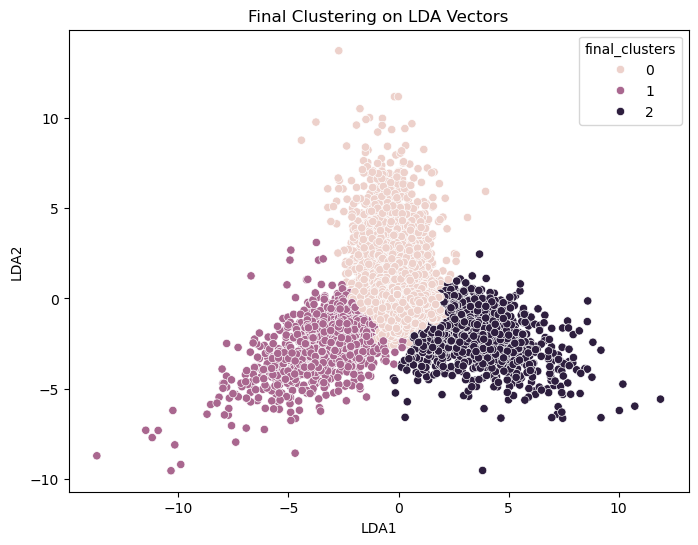

In [46]:
df_lda['final_clusters'] = final_clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_lda, x='LDA1', y='LDA2', hue='final_clusters')
plt.title('Final Clustering on LDA Vectors')
plt.show()

In [47]:
cross_tab_final = pd.crosstab(df_lda['label'], df_lda['final_clusters'])

print(cross_tab_final)

final_clusters      0     1     2
label                            
IT              13267    17     5
politique        8745  1993     7
santé           12947    55  1784


# Exercice 3 : Réduction de dimensions comme étape de prétraitement

L'objectif de cet exercice est d'utiliser la réduction de dimensions comme une étape de prétraitement pour compresser les données avant de procéder au clustering par k-means. Dans ce cas, le nombre de dimensions peut être supérieur à 2. Comparez ensuite les étiquettes réelles des données avec celles obtenues via k-means, à la fois visuellement et numériquement.

#### Étapes Suggérées
1. **Réduction de dimensions** :
   - Appliquez une méthode de réduction de dimensions (comme l'ACP ou UMAP) sur vos données. Choisissez un nombre de dimensions supérieur à 2 pour la compression.
   - Cette étape vise à réduire le bruit et à améliorer l'efficacité du clustering.


2. **Clustering avec k-means** :
   - Utilisez l'algorithme k-means sur les données compressées pour les regrouper en clusters.


3. **Visualisation 2D** :
   - Visualisez les clusters.


4. **Comparaison des étiquettes** :
   - Visuellement : Comparez les clusters obtenus avec les étiquettes réelles des données sur le graphique 2D.
   - Numériquement : Utilisez le score NMI pour évaluer numériquement la correspondance entre les clusters k-means et les étiquettes réelles.
   

In [48]:
# A vous de jouer!

# Exercice 4 : Entraînement d'un modèle Word2Vec

1. **Expérimentez avec les paramètres :** Testez différents paramètres pour entraîner des modèles Word2Vec, à la fois en mode skip-gram et CBOW.
2. **Visualisation des vecteurs :** Utilisez le Projecteur TensorBoard pour visualiser les vecteurs de mots.
3. **Calcul de la représentation des documents** : Appliquez le modèle Word2Vec pour calculer la représentation vectorielle des documents dans votre corpus. Cela implique l'agrégation des vecteurs de mots pour chaque document en prenant la moyenne ou la somme.
4. **Réduction de dimension :** Mettez en œuvre une méthode de réduction de dimension sur vos documents.
5. **Clustering avec K-means :** Après la réduction de dimension, utilisez l'algorithme K-means pour regrouper les documents.


**Ressources pour vous aider :**
- Consultez la [documentation Gensim](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#online-training-resuming-training) pour des orientations sur l'entraînement de modèles Word2Vec.


In [49]:
from gensim.models import Word2Vec
import time


# Démarrer un chronomètre pour mesurer le temps d'entraînement.
start = time.time()

# Créer une instance du modèle Word2Vec.
# - vector_size=100: Chaque mot sera représenté par un vecteur de 100 dimensions.
# - window=6: Fenêtre contextuelle de 6 mots de chaque côté du mot cible.
# - min_count=2: Les mots doivent apparaître au moins 2 fois pour être considérés.
# - sg=1: Utiliser l'architecture skip-gram (sg=0 pour CBOW).
# - hs=0: Ne pas utiliser de softmax hiérarchique pour l'entraînement.
# - negative=5: Utiliser l'échantillonnage négatif avec 5 mots "négatifs".
my_w2v_model = Word2Vec(vector_size=100, window=6, min_count=2, sg=1, hs=0, negative=5)

# Construire le vocabulaire à partir du corpus.
# corpus_iterable=wiki_corpus: Le corpus sur lequel entraîner le modèle.
my_w2v_model.build_vocab(corpus_iterable=corpus)

# Entraîner le modèle sur le corpus.
# total_examples=len(wiki_corpus): Le nombre total de phrases dans le corpus.
# epochs=10: Nombre de passages à travers le corpus pour l'entraînement.
my_w2v_model.train(corpus_iterable=corpus, total_examples=len(corpus), epochs=10)

# Calculer et afficher le temps total pris pour l'entraînement.
end = time.time()
print('le temps d\'entraînement a été de : {} secondes'.format(round(end - start, 2)))

NameError: name 'corpus' is not defined

In [ ]:
# La taille du vocabulaire.
len(my_w2v_model.wv.index_to_key)

22365

In [ ]:
my_w2v_model.wv.most_similar('président', topn=10)

[('présidence', 0.7872520089149475),
 ('vice', 0.7630820274353027),
 ('république', 0.7298510670661926),
 ('présidents', 0.6673235297203064),
 ('avion', 0.6563133597373962),
 ('chancelier', 0.6460497379302979),
 ('présidentiel', 0.6451638340950012),
 ('mandats', 0.6448519229888916),
 ('fédéral', 0.6397249698638916),
 ('nomination', 0.6371732950210571)]

In [ ]:
my_w2v_model.wv.most_similar('santé', topn=10)

[('publique', 0.7665170431137085),
 ('répertoire', 0.6116508841514587),
 ('éducation', 0.6019061207771301),
 ('adeli', 0.6001928448677063),
 ('prévention', 0.5868645906448364),
 ('soins', 0.5828026533126831),
 ('infantile', 0.5760468244552612),
 ('mentale', 0.5722870230674744),
 ('attenant', 0.5611083507537842),
 ('sanitaires', 0.560737133026123)]

In [ ]:
my_w2v_model.wv.most_similar('médecin', topn=10)

[('jacques', 0.7409529089927673),
 ('généraliste', 0.5716484189033508),
 ('femme', 0.570145845413208),
 ('spécialiste', 0.5544267296791077),
 ('lucas', 0.5521621704101562),
 ('nice', 0.5412753820419312),
 ('père', 0.5398703217506409),
 ('géronte', 0.5260825157165527),
 ('malade', 0.525394856929779),
 ('roncero', 0.5188140869140625)]

Exporter le model :

In [ ]:
my_w2v_model.save("my_custom_word2vec_model.model")

In [ ]:
my_w2v_model = Word2Vec.load("my_custom_word2vec_model.model")

In [ ]:
# A vous de jouer!

# Exercice 5 : Entraînement d'un modèle fastText

En suivant les étapes mentionnées dans l'exercice 4, procédez au clustering en utilisant fastText.